<a href="https://colab.research.google.com/github/braysonimbambi455/ARTIFICIAL-INTELIGENCE-PROJECTS/blob/main/Logistic_regression_for_Ames_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd # import pandas package to read in data
import numpy as np # import numpy for
import scipy.stats as stats # importing stats module to set up A-B aka t-test test
from sklearn.model_selection import train_test_split # import sklearn module to split the data into training and testing sets
import statsmodels.api as sm # import statsmodels.api module as sm
import seaborn as sns # import seaborn and matplotlib to visualise the correlation matrix
import matplotlib.pyplot as plt
import sklearn.metrics as metrics # import metrics to crease the confusion metrix

In [8]:
 # read in the csv from the file location
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
ames = pd.read_csv('/content/AmesHousing (1).csv')
ames.head()

,Lot Area,Overall Qual,Overall Cond,Gr Liv Area,TotRms AbvGrd,Yr Sold,SalePrice
0,31770,6,5,1656,7,2010,215000
1,11622,5,6,896,5,2010,105000
2,14267,6,6,1329,6,2010,172000
3,11160,7,5,2110,8,2010,244000
4,13830,5,5,1629,6,2010,189900


In [9]:
# Convert the continuous dependent varaible into a discrete, binary variable
# Creates new column, called target value, which is true when equal or greater then 200,000
ames['target value'] = (ames['SalePrice'] >= 200000)
ames.head()

,Lot Area,Overall Qual,Overall Cond,Gr Liv Area,TotRms AbvGrd,Yr Sold,SalePrice,target value
0,31770,6,5,1656,7,2010,215000,True
1,11622,5,6,896,5,2010,105000,False
2,14267,6,6,1329,6,2010,172000,False
3,11160,7,5,2110,8,2010,244000,True
4,13830,5,5,1629,6,2010,189900,False


In [10]:
# calculate the means of the independent variables, grouping by the new discrete dependent variable
ames.groupby('target value').mean()

,Lot Area,Overall Qual,Overall Cond,Gr Liv Area,TotRms AbvGrd,Yr Sold,SalePrice
target value,,,,,,,
False,9033.030185,5.483934,5.658715,1306.930380,6.032132,2007.803797,140245.305745
True,12762.062785,7.527397,5.339041,1951.664384,7.406393,2007.759132,275877.394977


In [11]:
# Split data, using the discreet dependent varaible 'target value'
group1 = ames[ames['target value'] == True]
group2 = ames[ames['target value'] == False]

# run t-test on independent variables
print('Lot Area ', stats.ttest_ind(group1['Lot Area'], group2['Lot Area']))
print('Overall Qual ', stats.ttest_ind(group1['Overall Qual'], group2['Overall Qual']))
print('Overall Cond ', stats.ttest_ind(group1['Overall Cond'], group2['Overall Cond']))
print('Gr Liv Area ', stats.ttest_ind(group1['Gr Liv Area'], group2['Gr Liv Area']))
print('TotRms AbvGrd ', stats.ttest_ind(group1['TotRms AbvGrd'], group2['TotRms AbvGrd']))
print('Yr Sold ', stats.ttest_ind(group1['Yr Sold'], group2['Yr Sold']))

Lot Area  TtestResult(statistic=np.float64(12.010357773110666), pvalue=np.float64(1.793734747012678e-32), df=np.float64(2928.0))
Overall Qual  TtestResult(statistic=np.float64(47.93751919037016), pvalue=np.float64(0.0), df=np.float64(2928.0))
Overall Cond  TtestResult(statistic=np.float64(-7.188296925907744), pvalue=np.float64(8.290017633689768e-13), df=np.float64(2928.0))
Gr Liv Area  TtestResult(statistic=np.float64(38.928767514080974), pvalue=np.float64(1.5834591903793514e-267), df=np.float64(2928.0))
TotRms AbvGrd  TtestResult(statistic=np.float64(23.619140019112713), pvalue=np.float64(4.823274671819433e-113), df=np.float64(2928.0))
Yr Sold  TtestResult(statistic=np.float64(-0.840632949411603), pvalue=np.float64(0.4006222345273083), df=np.float64(2928.0))


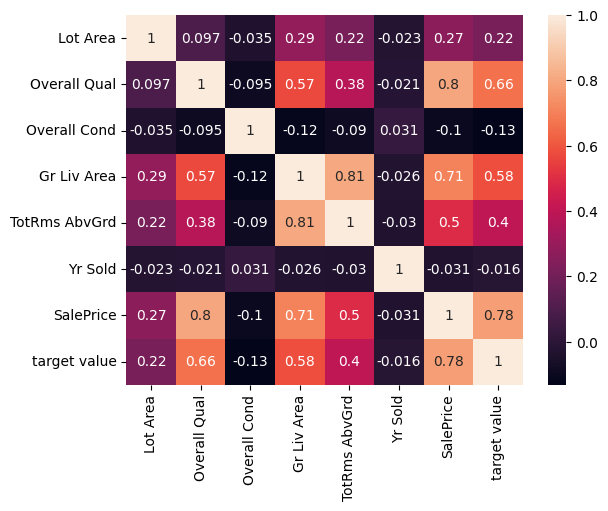

In [12]:
matrix = ames.corr() # create a correlation matrix to visualise the variable correlation
sns.heatmap(matrix,annot=True)
plt.show()

In [13]:
ames = ames[['Lot Area', 'Overall Qual', 'target value']] # Select only relevant columns
ames.head()

,Lot Area,Overall Qual,target value
0,31770,6,True
1,11622,5,False
2,14267,6,False
3,11160,7,True
4,13830,5,False


In [14]:
train_data, test_data = train_test_split(ames) # Split the data into training and testing data sets
train_data.head()

,Lot Area,Overall Qual,target value
2806,12393,7,False
226,11227,5,False
1607,12508,6,False
1741,3922,7,False
1098,9660,8,True


In [15]:
# assign the independent and dependent variables
dependent = train_data['target value']
independent = train_data[['Lot Area','Overall Qual']]
independent = sm.add_constant(independent) # add a constant to the independent variable, in order to improve fitting

model = sm.Logit(dependent,independent).fit() # Building the logistic model
model.summary()

Optimization terminated successfully.
         Current function value: 0.295710
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           target value   No. Observations:                 2197
Model:                          Logit   Df Residuals:                     2194
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 May 2025   Pseudo R-squ.:                  0.5209
Time:                        08:13:10   Log-Likelihood:                -649.67
converged:                       True   LL-Null:                       -1356.1
Covariance Type:            nonrobust   LLR p-value:                1.629e-307
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.8441      0.689    -23.001      0.000     -17.194     -14.494
Lot Area         0.0002   1.53e-05     10.368      0.000       0.000       0.000
Overall Qual     2.0568      0.093     22.208      0.000       1.875       2.238
================================================================================
"""

In [16]:
test_actual = test_data['target value'] # assign the test dependent variable
test_independent = test_data[['Lot Area','Overall Qual']]  # assign the test independent variable
test_independent = sm.add_constant(test_independent) # add a constand to the independent variable to imnprove fitting

test_predicted = model.predict(test_independent) >= 0.5 # predict using independent variables when dependent = true
test_predicted.head()

,0
693,False
1673,False
917,False
1577,False
2420,False


<Axes: >

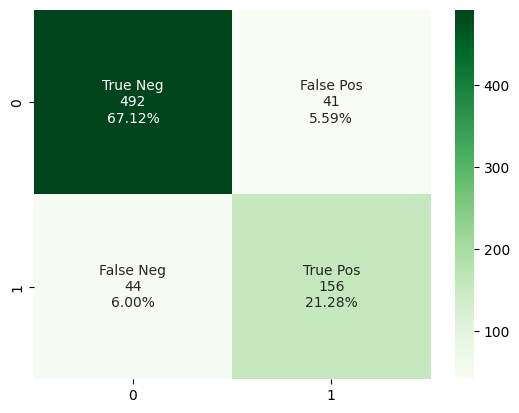

In [17]:
# Use seaborn to better visualise the confusion matrix, to better determine the model accuracy
ConfMatrix = metrics.confusion_matrix(test_actual, test_predicted)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in ConfMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in ConfMatrix.flatten()/np.sum(ConfMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(ConfMatrix, annot=labels, fmt='', cmap='Greens')